In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords

In [4]:
data_corona = pd.read_csv(r'D:\coronanlp\corona.csv',encoding='latin1')

In [5]:
data_corona

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
data_corona.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
data_corona.shape

(41157, 6)

In [8]:
data_corona.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
data_corona['Sentiment']=data_corona['Sentiment'].replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'})
data_corona['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [76]:
import matplotlib.pyplot as plt

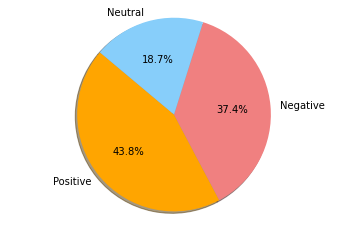

In [82]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [18046, 15398, 7713]
colors = ['orange', 'lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [10]:
data_corona['OriginalTweet'].sample(2)

5868    95% of consumer toilet tissue is made in the U...
2197    Not sure how many days we are into to this cri...
Name: OriginalTweet, dtype: object

In [11]:
data_corona['OriginalTweet'][1823]

"Saks Fifth Avenue has closed their Manhattan Flagship store for up to 2 weeks! Watch this livestream showing Saks Store, Fifth Avenue, St Patrick's Cathedral to see how empty NYC is, #StPatricksDay Parade would have taken place here #retail #CoronaVirus   https://t.co/GnV8Jbewab"

In [12]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
lb = WordNetLemmatizer()
sw = stopwords.words( 'english' )
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
import nltk
nltk.download('wordnet')
corpus = [ ]
for i in data_corona[ 'OriginalTweet']:
    txt=re.sub('[^A-Za-z0-9]', ' ', i)
    txt=txt.lower()
    txt=word_tokenize(txt)
    txt=[i for i in txt if i not in sw]
    txt=[lb.lemmatize(i) for i in txt]
    txt= " ".join(txt)
    corpus.append(txt)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khrisham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
print(corpus[ : 10])

['menyrbie phil gahan chrisitv http co ifz9fan2pa http co xx6ghgfzcc http co i2nlzdxno8', 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order', 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak http co binca9vp8p', 'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral http co zrlg0z520j', 'ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement http co usmualq72n', 'news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report http co cfxch7

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 5000)
tf_res=tf . fit_transform(corpus) . toarray()

In [18]:
print(tf_res[ : 5] )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print(type(tf_res))

<class 'numpy.ndarray'>


In [20]:
x= tf_res
y= data_corona['Sentiment' ]
print(len(x))
print(y.shape)

41157
(41157,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train , x_test ,y_train , y_test = train_test_split (x,y,test_size=0.25)
x_train
x_test
y_train
y_test

17801    Positive
39826    Positive
14277     Neutral
39714     Neutral
18125    Negative
           ...   
14855    Negative
6355     Positive
34356    Negative
8894     Negative
29069     Neutral
Name: Sentiment, Length: 10290, dtype: object

In [23]:
x_train,x_test,y_train , y_test = train_test_split (x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30867, 5000)
(10290, 5000)
(30867,)
(10290,)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
m1= MultinomialNB()
m1.fit(x_train,y_train)

MultinomialNB()

In [26]:
print('Training Score', m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.7259856805002106
Testing Score 0.6687074829931973


In [27]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

['Positive' 'Positive' 'Negative' ... 'Negative' 'Positive' 'Negative']


In [28]:
cm_m1=confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[2809   90 1033]
 [ 515  381 1066]
 [ 632   73 3691]]
              precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      3932
     Neutral       0.70      0.19      0.30      1962
    Positive       0.64      0.84      0.72      4396

    accuracy                           0.67     10290
   macro avg       0.68      0.58      0.58     10290
weighted avg       0.68      0.67      0.64     10290



In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
m1= MultinomialNB()
m1.fit(x_train,y_train)

MultinomialNB()

In [31]:
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.7259856805002106
Testing Score 0.6687074829931973


In [32]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

['Positive' 'Positive' 'Negative' ... 'Negative' 'Positive' 'Negative']


In [33]:
cm_m1=confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[2809   90 1033]
 [ 515  381 1066]
 [ 632   73 3691]]
              precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      3932
     Neutral       0.70      0.19      0.30      1962
    Positive       0.64      0.84      0.72      4396

    accuracy                           0.67     10290
   macro avg       0.68      0.58      0.58     10290
weighted avg       0.68      0.67      0.64     10290



In [34]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [35]:
X_std=std.fit_transform(x_train)
data_test_std=std.transform(x_test)

In [36]:
X_std

array([[-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       ...,
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015]])

In [37]:
data_test_std

array([[-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       ...,
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015]])

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [39]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
Y_pred=dt.predict(x_test)

In [41]:
Y_pred

array(['Neutral', 'Negative', 'Negative', ..., 'Negative', 'Neutral',
       'Negative'], dtype=object)

In [42]:
y_test

23037    Negative
32537     Neutral
34941    Positive
9891     Negative
40285    Negative
           ...   
6420     Positive
18744    Positive
24529    Negative
26504     Neutral
5224     Negative
Name: Sentiment, Length: 10290, dtype: object

# Confusion Matrix

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
dt_ac=accuracy_score(y_test,Y_pred)

In [45]:
dt_ac

0.5988338192419825

# KNN Prediction

In [46]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [47]:
x_test_std

array([[-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       ...,
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015],
       [-0.04635936, -0.09614943, -0.01877832, ..., -0.03005487,
        -0.02593816, -0.02547015]])

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [49]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [50]:
Y_pred=knn.predict(x_test_std)

In [51]:
Y_pred

array(['Positive', 'Neutral', 'Positive', ..., 'Neutral', 'Neutral',
       'Negative'], dtype=object)

In [52]:
y_test

23037    Negative
32537     Neutral
34941    Positive
9891     Negative
40285    Negative
           ...   
6420     Positive
18744    Positive
24529    Negative
26504     Neutral
5224     Negative
Name: Sentiment, Length: 10290, dtype: object

In [53]:
knn_ac=accuracy_score(y_test,Y_pred)

In [54]:
knn_ac

0.2835762876579203

# Logistic Regression Prediction

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [56]:
lr.fit(x_train_std,y_train)

C:\Users\khrisham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
Y_pred=lr.predict(x_test_std)

In [58]:
Y_pred

array(['Neutral', 'Positive', 'Positive', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [59]:
lr_ac=accuracy_score(y_test,Y_pred)

In [60]:
lr_ac

0.7477162293488824

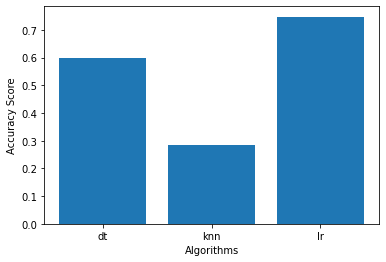

In [61]:
plt.bar(x=['dt','knn','lr'],height=[dt_ac,knn_ac,lr_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [63]:
rfc.fit(x_train_std,y_train)

RandomForestClassifier()

In [64]:
Y_pred=rfc.predict(x_test)

In [65]:
rfc_ac=accuracy_score(y_test,Y_pred)

<AxesSubplot:>

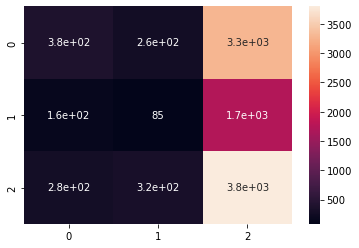

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cm,annot=True)

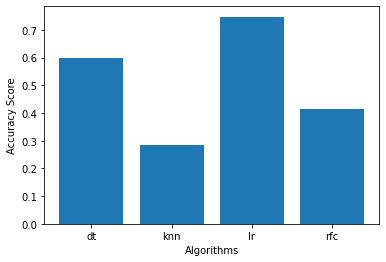

In [67]:
plt.bar(x=['dt','knn','lr','rfc'],height=[dt_ac,knn_ac,lr_ac,rfc_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

# Inference

From the above computed Accuracy Score and Comparison Graph , it is evident that Logistics Regression Model is observed to provide the best accuracy for the given training dataset.

Advantages of Logistics Regression over other data models:

Logistic Regression is very easy to understand. 

1.It requires less training.
2.It performs well for simple datasets as well as when the data set is linearly separable.
3.It doesn't make any assumptions about the distributions of classes in feature space.
4.Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-     level independent variables.
5.It makes no assumptions about distributions of classes in feature space.